# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

Load the data: load the wine dataset from sklearn, and assign the feature names to a variable called X.

In [34]:
# your code here:
from sklearn.datasets import load_wine

dataset = load_wine()
X=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])

## Challenge 1: K-Means

#### 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [35]:
print(X.dtypes)
X.head()

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [48]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

X['clusters'] = kmeans.predict(X)

print(silhouette_score(X, kmeans.predict(X)))
print(kmeans.inertia_)

# Explore the cluster assignment in the original dataset
X['clusters'].value_counts()

0.5375707442881263
324428.40788662713


2    34
4    31
0    27
3    24
7    23
1    17
6    16
5     6
Name: clusters, dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

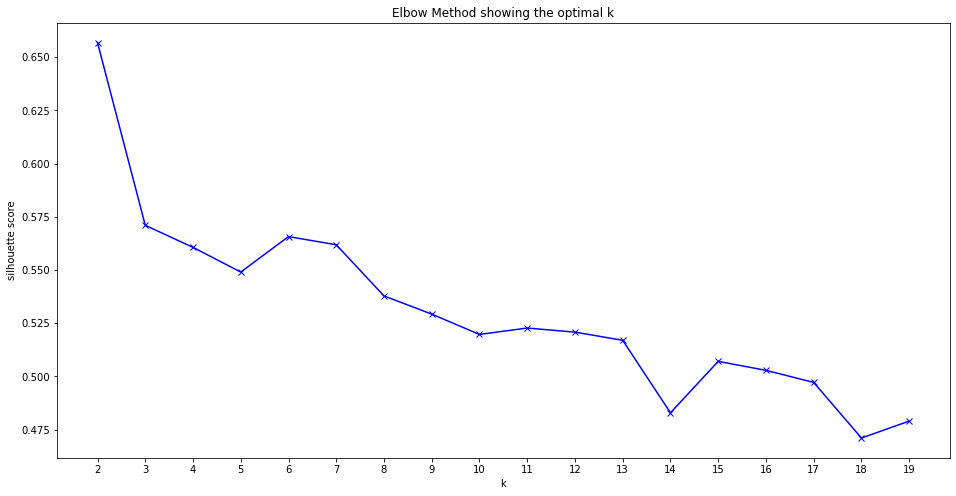

#### 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [49]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

X['clusters'] = kmeans.predict(X)

print(silhouette_score(X, kmeans.predict(X)))
print(kmeans.inertia_)
# Explore the cluster assignment in the original dataset
X['clusters'].value_counts()

0.5491300569508313
917197.2414049292


1    57
4    48
3    27
0    26
2    20
Name: clusters, dtype: int64

#### 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [50]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

X['clusters'] = kmeans.predict(X)

print(silhouette_score(X, kmeans.predict(X)))
print(kmeans.inertia_)

# Explore the cluster assignment in the original dataset
X['clusters'].value_counts()

0.5711566129967665
2371031.941923072


2    69
0    62
1    47
Name: clusters, dtype: int64

#### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

Please do two visualizations: one with inertia, and one with the silhouette score.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

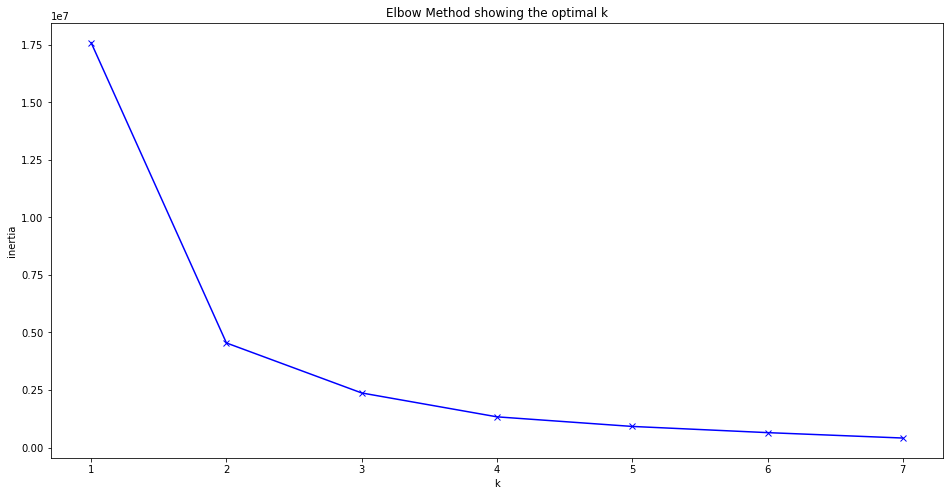

In [47]:
K = range(1, 8)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

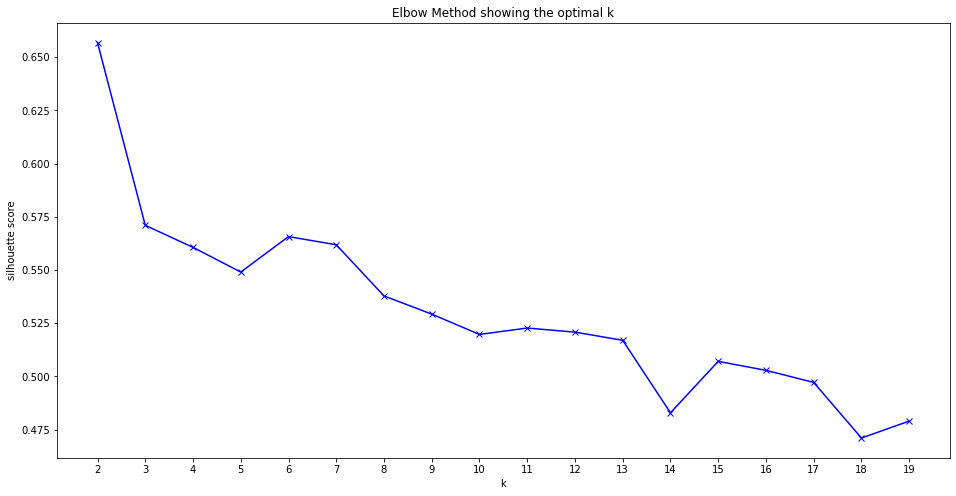

In [41]:
# your code here:

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


## Challenge 2: Aggromerative Clustering

#### 1. Please fit an AgglomerativeClustering model and compare the results you get to the KMeans results. Plot an elbow curve using the silhouette score.

In [57]:
from sklearn.cluster import AgglomerativeClustering

agc_model = AgglomerativeClustering(n_clusters = 8)

# fit model and predict clusters
X['clusters'] = agc_model.fit_predict(X)
print(silhouette_score(X, agc_model.fit_predict(X)))


0.5303315504794782


Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

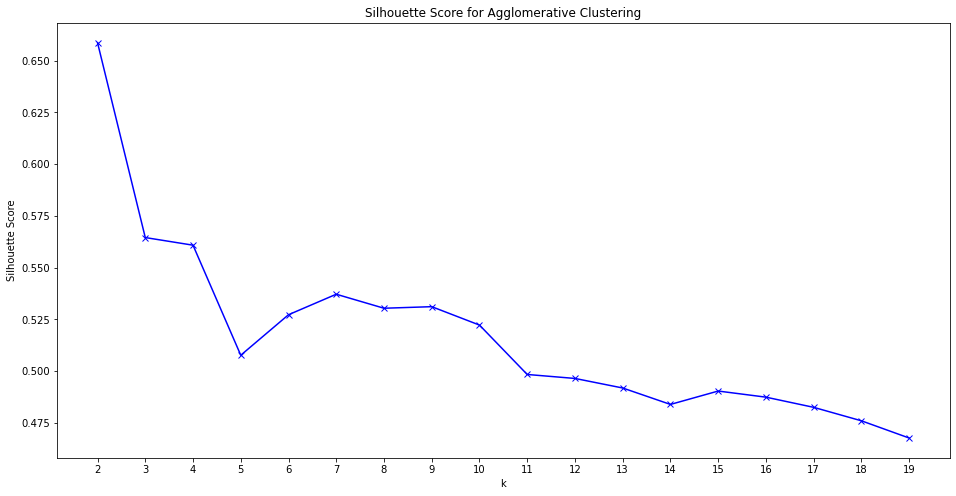

In [58]:
K = range(2, 20)
silhouette = []

for k in K:
    agc_model = AgglomerativeClustering(n_clusters=k)
    agc_model.fit(X)
    silhouette.append(silhouette_score(X, agc_model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

#### 2. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [63]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 5)

# fit model and predict clusters
X['agg_clusters'] = model.fit_predict(X)


In [64]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

X['k_clusters'] = kmeans.predict(X)

In [65]:
pd.crosstab(X['agg_clusters'],X['k_clusters'])

k_clusters,0,1,2
agg_clusters,,,
0,58,0,0
1,0,20,0
2,3,0,41
3,1,27,0
4,0,0,28


## Bonus Challenge: 
#### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.